<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/IrisTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [32]:
np.random.seed(0)

train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

X_train = train_data.drop(['species'], axis=1)
y_train = train_data.species

X_test = test_data.drop(['species'], axis=1)
y_test = test_data.species

In [33]:
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [34]:
train = []
test = []
vals = []

for val in range(1, 100 + 1):
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=val)
  clf.fit(X_train, y_train)
  train.append(clf.score(X_train, y_train))
  test.append(clf.score(X_test, y_test))
  vals.append(val)

print(set(train))
print(test)

{0.7, 0.97, 0.99, 1.0}
[0.6, 0.94, 0.94, 0.92, 0.92, 0.94, 0.94, 0.92, 0.92, 0.92, 0.94, 0.92, 0.94, 0.92, 0.94, 0.92, 0.92, 0.94, 0.94, 0.94, 0.92, 0.94, 0.94, 0.92, 0.92, 0.94, 0.92, 0.92, 0.92, 0.92, 0.94, 0.94, 0.92, 0.92, 0.94, 0.92, 0.92, 0.94, 0.92, 0.92, 0.92, 0.92, 0.92, 0.94, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.94, 0.92, 0.92, 0.94, 0.94, 0.92, 0.92, 0.92, 0.92, 0.92, 0.94, 0.94, 0.92, 0.92, 0.94, 0.94, 0.94, 0.92, 0.92, 0.92, 0.94, 0.92, 0.92, 0.92, 0.94, 0.92, 0.94, 0.94, 0.92, 0.94, 0.94, 0.92, 0.94, 0.94, 0.92, 0.92, 0.94, 0.92, 0.92, 0.92, 0.92, 0.94, 0.92, 0.94]


In [35]:
df = pd.DataFrame({'train': train,
                   'test': test,
                   'val': vals})

df.head()

,train,test,val
0,0.70,0.60,1
1,0.97,0.94,2
2,0.99,0.94,3
3,1.00,0.92,4
4,1.00,0.92,5


In [36]:
df = pd.melt(df,
            id_vars=['val'],
            value_vars=['train', 'test'],
            var_name='set_type', value_name='score')

In [37]:
df.head()

,val,set_type,score
0,1,train,0.70
1,2,train,0.97
2,3,train,0.99
3,4,train,1.00
4,5,train,1.00


<Axes: xlabel='val', ylabel='score'>

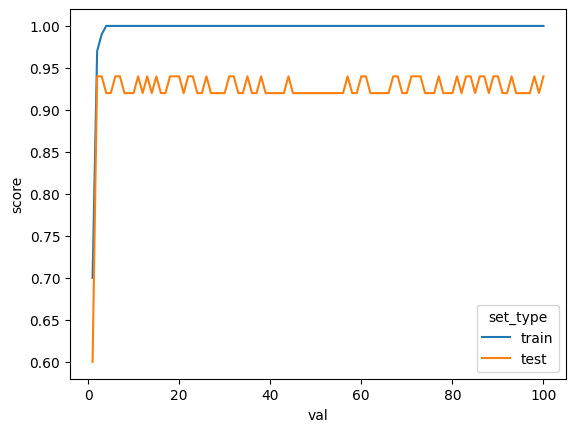

In [38]:
sns.lineplot(x='val', y='score', hue='set_type', data=df)